# Farrow arbitrary resampler

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
# %matplotlib widget
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## Construct an input signal, $x[n] = x(n T_s)$

In [2]:
sample_rate = 1  # samples/s
N = 100  # samples
freq = 0.05  # Hz
tx = np.arange(0, N) / sample_rate  # Time axis for the input signal
x = np.exp(1j * 2 * np.pi * freq * tx)  # Complex exponential input signal
x *= np.exp(-np.arange(N) / 100)  # Exponential decay

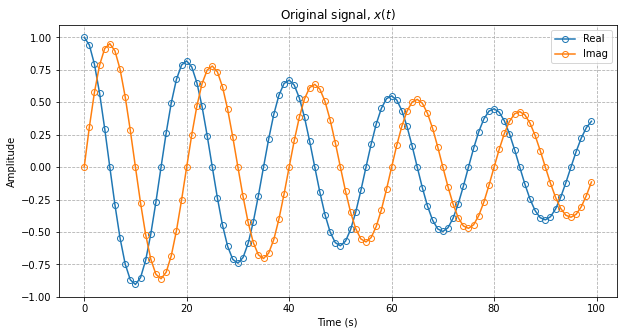

In [3]:
plt.figure(figsize=[10, 5])
plt.plot(tx, x.real, marker="o", fillstyle="none", label="Real")
plt.plot(tx, x.imag, marker="o", fillstyle="none", label="Imag")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original signal, $x(t)$")
plt.legend()
plt.grid(which="both", linestyle="--")
plt.show()

## Resample the input signal with rate $r$, $y[n] = x(n \frac{T_s}{r})$

In the {obj}`sdr` library, the Farrow arbitrary resampler is implemented in {obj}`sdr.FarrowResampler`.

In [4]:
def resample_signal(rate):
    farrow = sdr.FarrowResampler()
    y = farrow.resample(x, rate)
    new_sample_rate = rate * sample_rate
    ty = np.arange(0, y.size) / new_sample_rate  # Time axis for output signal

    print(f"Input signal length: {x.size}")
    print(f"Output signal length: {y.size}")

    plt.figure(figsize=[10, 5])
    plt.plot(tx, x.real, color=colors[0], linestyle="--", marker="o", fillstyle="none", label="Input (real)")
    plt.plot(tx, x.imag, color=colors[1], linestyle="--", marker="o", fillstyle="none", label="Input (imag)")
    plt.plot(ty, y.real, color=colors[0], linestyle="-", marker=".", label="Output (real)")
    plt.plot(ty, y.imag, color=colors[1], linestyle="-", marker=".", label="Output (imag)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(f"Original $x(t)$ and resampled signal $y(t)$, rate = {rate}")
    plt.legend()
    plt.grid(which="both", linestyle="--")
    plt.show()

## Upsample the signal by an integer rate

When upsampling by 2, notice there are two output samples for every input sample.

Input signal length: 100
Output signal length: 200


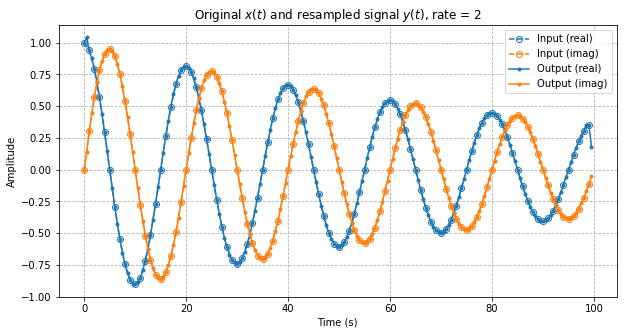

In [5]:
resample_signal(2)

When upsampling by 4, notice there are four output samples for every input sample.

Input signal length: 100
Output signal length: 400


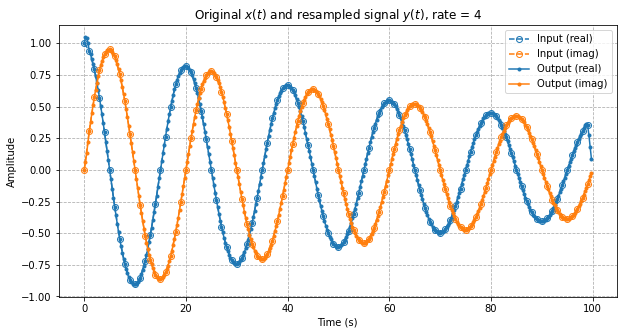

In [6]:
resample_signal(4)

## Downsample the signal by an integer rate

When downsampling by 2, notice every other sample of the input appears at the output.

Input signal length: 100
Output signal length: 50


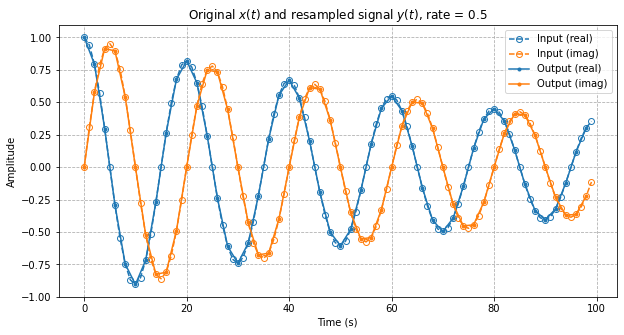

In [7]:
resample_signal(1 / 2)

When downsampling by 4, notice every fourth sample of the input appears at the output.

Input signal length: 100
Output signal length: 25


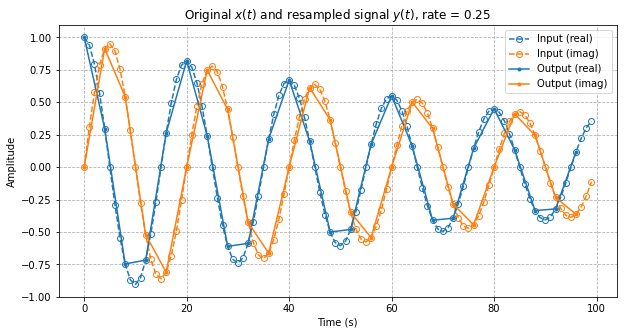

In [8]:
resample_signal(1 / 4)

## Upsample by an irrational rate

When upsampling by $\pi$, notice there are roughly three output samples for every input sample.
However, these samples often do not align with the original input samples.

Input signal length: 100
Output signal length: 315


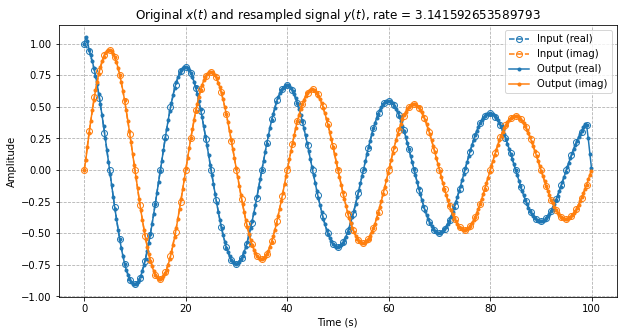

In [9]:
resample_signal(np.pi)

## Downsample by an irrational rate

When downsampling by $\pi$, notice there are roughly three input samples for every output sample.
However, these samples often do not align with the original input samples.

Input signal length: 100
Output signal length: 32


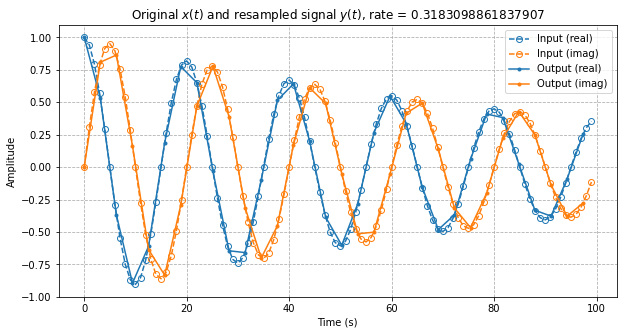

In [10]:
resample_signal(1 / np.pi)